## Importing required libraries

In [1]:
import pandas as pd
import numpy as np
import missingno as mn
from wordcloud import WordCloud as wc
from wordcloud import STOPWORDS as sw
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### WordCloud    
    
    Word Cloud is a data visualization technique used for representing text data in which the size of each word indicates its frequency or importance. Significant textual data points can be highlighted using a word cloud. Word clouds are widely used for analyzing data from social network websites.
    
    Advantages of Word Clouds :
        Analyzing customer and employee feedback.
        Identifying new SEO keywords to target.
        
    Drawbacks of Word Clouds :
        Word Clouds are not perfect for every situation.
        Data should be optimized for context.


### missingno

    Missing data visualization module for Python

    it is very common that some values in the dataset are missing. We represent these missing values as NaN (Not a Number) values. But to build a good machine learning model our dataset should be complete.

### StopWords

    The process of converting data to something a computer can understand is referred to as pre-processing. One of the major forms of pre-processing is to filter out useless data. In natural language processing, useless words (data), are referred to as stop words.
    
    Stop Words: A stop word is a commonly used word (such as “the”, “a”, “an”, “in”) that a search engine has been programmed to ignore, both when indexing entries for searching and when retrieving them as the result of a search query.

In [2]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
print(stopwords.words('english'))

[nltk_data] Downloading package stopwords to C:\Users\Harish
[nltk_data]     Sriramoju\AppData\Roaming\nltk_data...


['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

[nltk_data]   Unzipping corpora\stopwords.zip.


### StandardScaler

    StandardScaler follows Standard Normal Distribution (SND). Therefore, it makes mean = 0 and scales the data to unit variance.
    MinMaxScaler scales all the data features in the range [0, 1] or else in the range [-1, 1] if there are negative values in the dataset. This scaling compresses all the inliers in the narrow range [0, 0.005].
    In the presence of outliers, StandardScaler does not guarantee balanced feature scales, due to the influence of the outliers while computing the empirical mean and standard deviation. This leads to the shrinkage in the range of the feature values.

    By using RobustScaler(), we can remove the outliers and then use either StandardScaler or MinMaxScaler for preprocessing the dataset.

In [2]:
import warnings
warnings.filterwarnings("ignore")

### Loading train and test dataset

In [3]:
df_train = pd.read_csv("emp_train_dataset.csv")
df_test = pd.read_csv("emp_test_dataset.csv")

### Understanding dimension of data

In [4]:
print (df_train.shape)
print (df_test.shape)

(108, 14)
(3956, 14)


### dataset information

In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108 entries, 0 to 107
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           108 non-null    int64  
 1   department            108 non-null    object 
 2   region                108 non-null    object 
 3   education             102 non-null    object 
 4   gender                108 non-null    object 
 5   recruitment_channel   108 non-null    object 
 6   no_of_trainings       107 non-null    float64
 7   age                   107 non-null    float64
 8   previous_year_rating  94 non-null     float64
 9   length_of_service     107 non-null    float64
 10  KPIs_met..80.         107 non-null    float64
 11  awards_won.           107 non-null    float64
 12  avg_training_score    107 non-null    float64
 13  is_promoted           107 non-null    float64
dtypes: float64(8), int64(1), object(5)
memory usage: 11.9+ KB


In [6]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3956 entries, 0 to 3955
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           3956 non-null   int64  
 1   department            3955 non-null   object 
 2   region                3955 non-null   object 
 3   education             3780 non-null   object 
 4   gender                3955 non-null   object 
 5   recruitment_channel   3955 non-null   object 
 6   no_of_trainings       3955 non-null   float64
 7   age                   3955 non-null   float64
 8   previous_year_rating  3666 non-null   float64
 9   length_of_service     3955 non-null   float64
 10  KPIs_met..80.         3955 non-null   float64
 11  awards_won.           3955 non-null   float64
 12  avg_training_score    3955 non-null   float64
 13  is_promoted           3955 non-null   float64
dtypes: float64(8), int64(1), object(5)
memory usage: 432.8+ KB


### sample data view

In [7]:
df_train.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met..80.,awards_won.,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1.0,35.0,5.0,8.0,1.0,0.0,49.0,0.0
1,65141,Operations,region_22,Bachelor's,m,other,1.0,30.0,5.0,4.0,0.0,0.0,60.0,0.0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1.0,34.0,3.0,7.0,0.0,0.0,50.0,0.0
3,48945,Technology,region_26,Bachelor's,m,other,1.0,45.0,3.0,2.0,0.0,0.0,73.0,0.0
4,58896,Analytics,region_2,Bachelor's,m,sourcing,2.0,31.0,3.0,7.0,0.0,0.0,85.0,0.0


In [8]:
df_test.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met..80.,awards_won.,avg_training_score,is_promoted
0,76419,Sales & Marketing,region_7,Master's & above,f,sourcing,1.0,42.0,4.0,4.0,1.0,0.0,48.0,0.0
1,53942,Technology,region_2,Below Secondary,f,other,2.0,24.0,3.0,2.0,0.0,0.0,77.0,0.0
2,60805,Sales & Marketing,region_16,Master's & above,m,other,2.0,36.0,3.0,7.0,0.0,0.0,50.0,0.0
3,65231,Legal,region_31,Bachelor's,m,other,1.0,33.0,3.0,6.0,0.0,0.0,54.0,0.0
4,70085,Technology,region_13,Master's & above,m,sourcing,1.0,42.0,4.0,4.0,0.0,0.0,79.0,0.0


### Understanding data

In [9]:
df_train.count()

employee_id             108
department              108
region                  108
education               102
gender                  108
recruitment_channel     108
no_of_trainings         107
age                     107
previous_year_rating     94
length_of_service       107
KPIs_met..80.           107
awards_won.             107
avg_training_score      107
is_promoted             107
dtype: int64

In [10]:
df_train.shape

(108, 14)

#### train dataset missing values information

In [11]:
df_train.isnull().sum()

employee_id              0
department               0
region                   0
education                6
gender                   0
recruitment_channel      0
no_of_trainings          1
age                      1
previous_year_rating    14
length_of_service        1
KPIs_met..80.            1
awards_won.              1
avg_training_score       1
is_promoted              1
dtype: int64

#### test dataset missing values information

In [12]:
df_test.isnull().sum()

employee_id               0
department                1
region                    1
education               176
gender                    1
recruitment_channel       1
no_of_trainings           1
age                       1
previous_year_rating    290
length_of_service         1
KPIs_met..80.             1
awards_won.               1
avg_training_score        1
is_promoted               1
dtype: int64

### Visualizing missing values information

#### emp_train_dataset missing values visualization

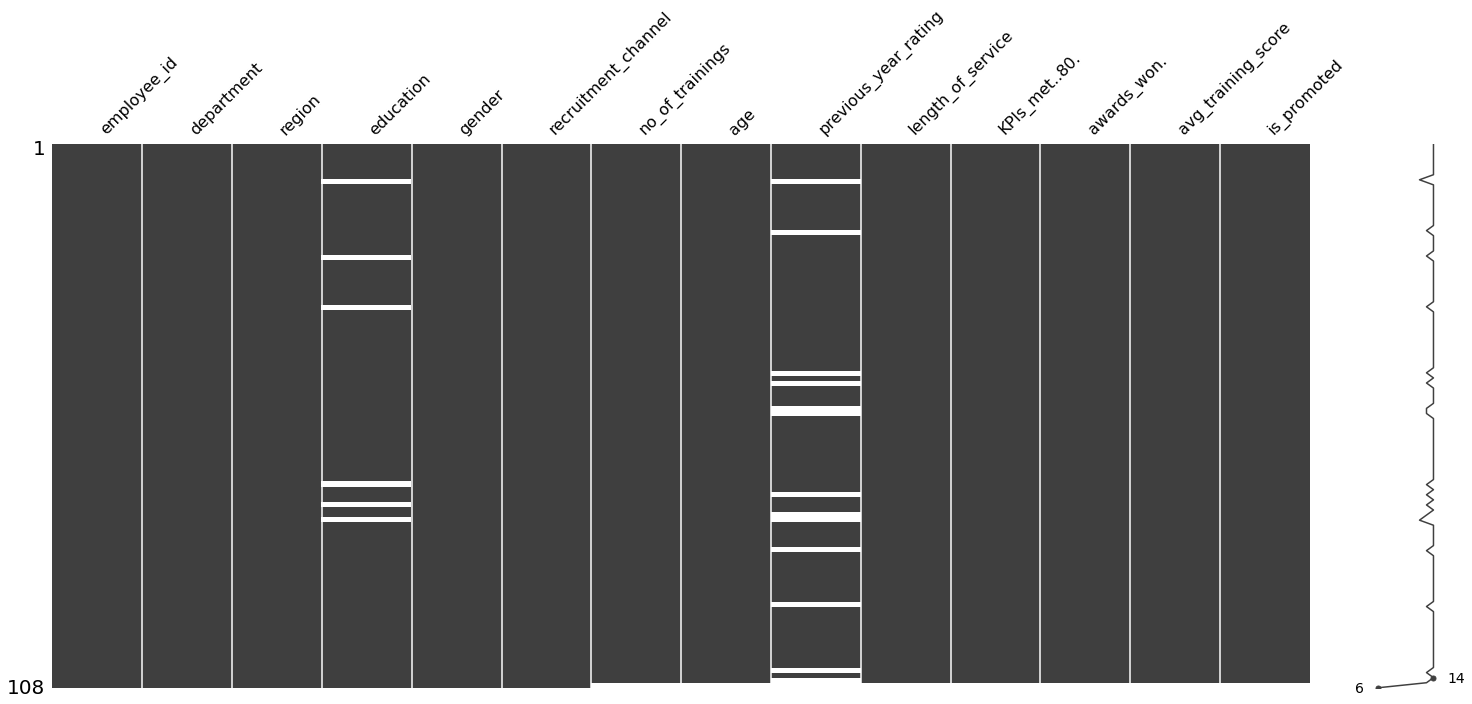

In [13]:
'''
To visualize missing values from dataset, we can use missingno module, 
which has to be seperately installed using "pip install missingno"

'''
mn.matrix(df_train)

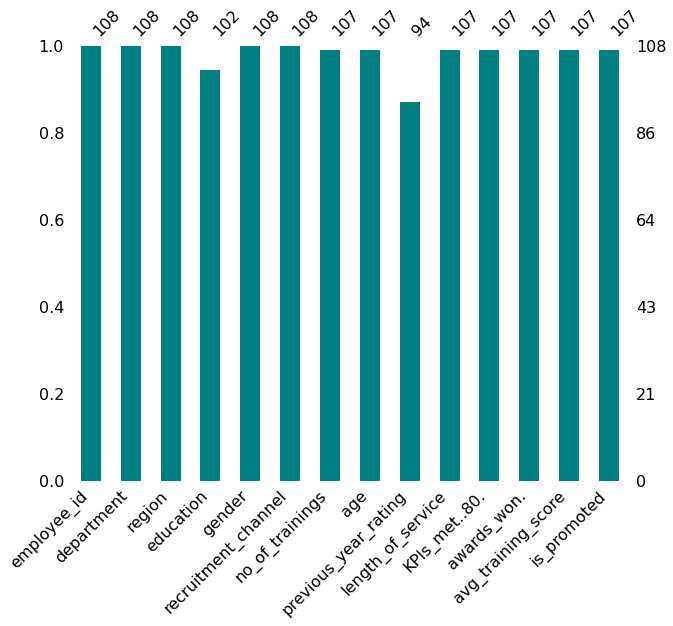

In [14]:
mn.bar(df_train, color = 'teal', figsize = (10,8))

    From the above figure, we can understand, "education" and "previous_year_rating" columns(features) have many missing values from emp_train_dataset

#### emp_test_dataset missing values visualization

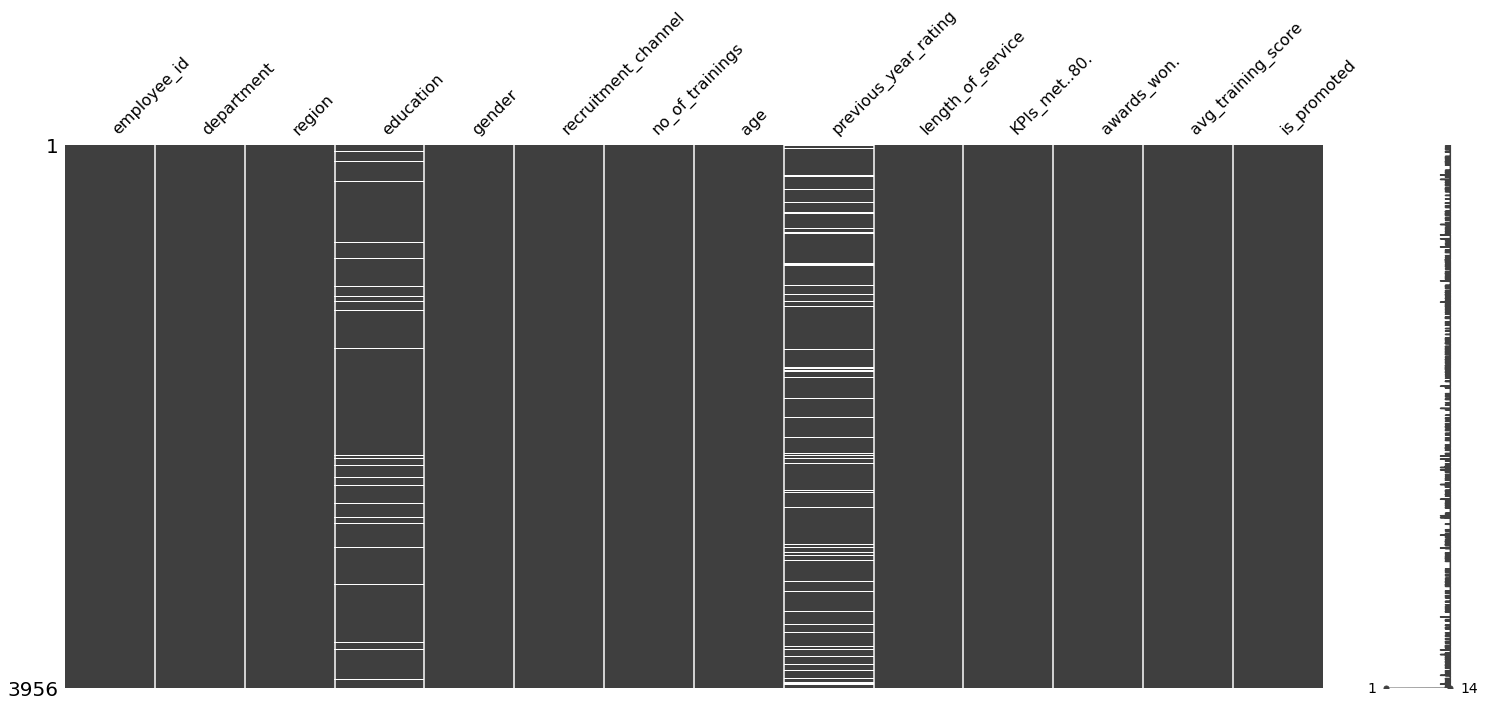

In [15]:
mn.matrix(df_test)

In [1]:
mn.bar(df_test, color = 'seagreen', figsize = (10,9))

NameError: name 'mn' is not defined

    Same from emp_test_dataset has missing values from "education" and "previous_year_rating" columns

### Exploratory Data Analysis (EDA) and Explanation

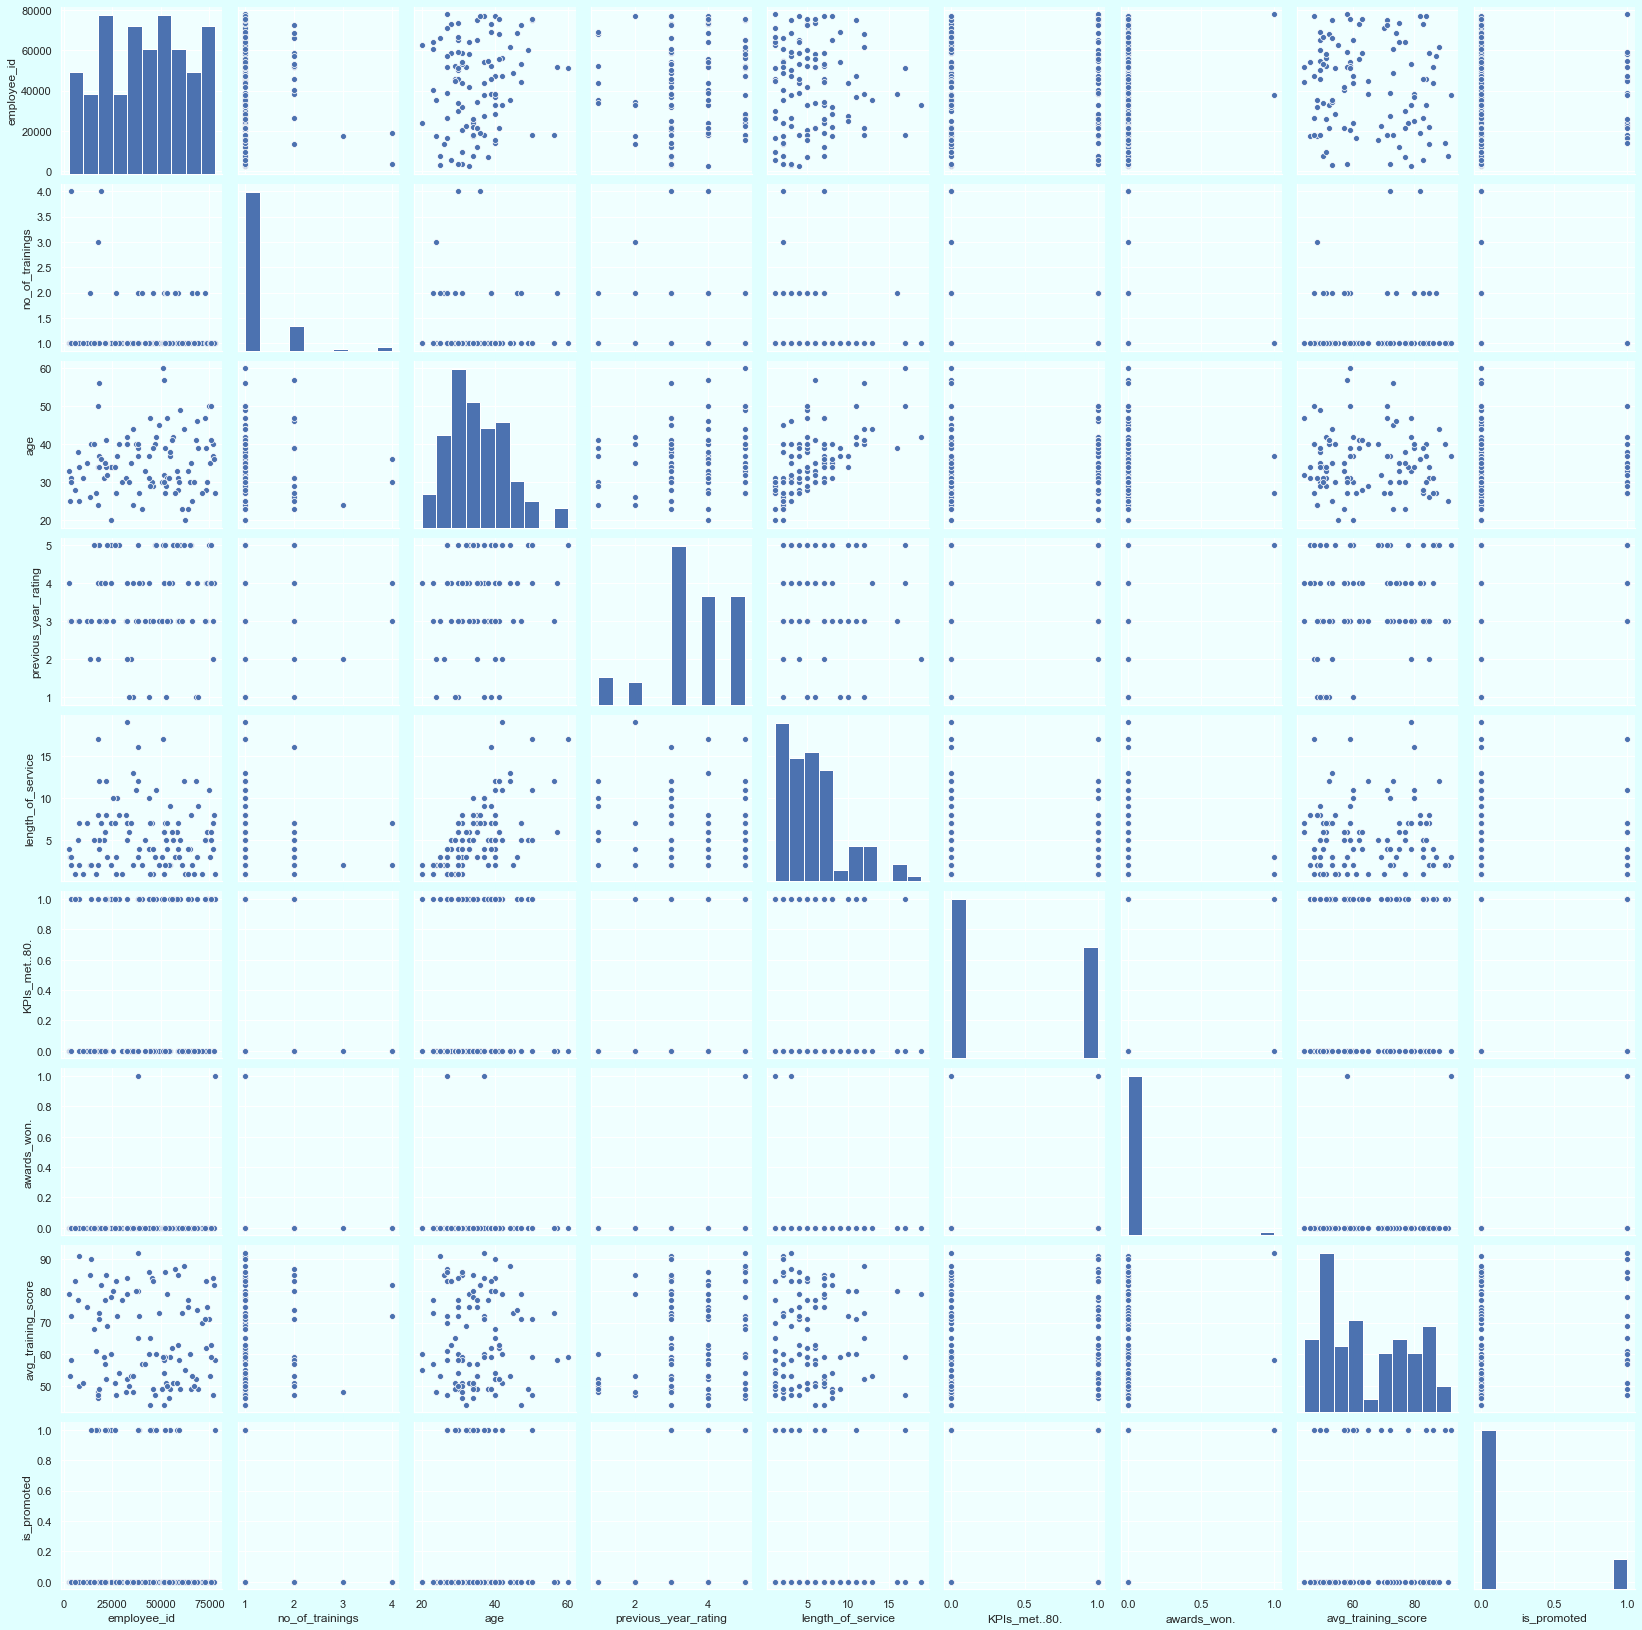

In [17]:
sns.set(rc={'axes.facecolor':'azure', 'figure.facecolor':'lightcyan'})
sns.pairplot(df_train)

#### Individual feature visualization

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001BAE8EC01C0>,
      dtype=object)

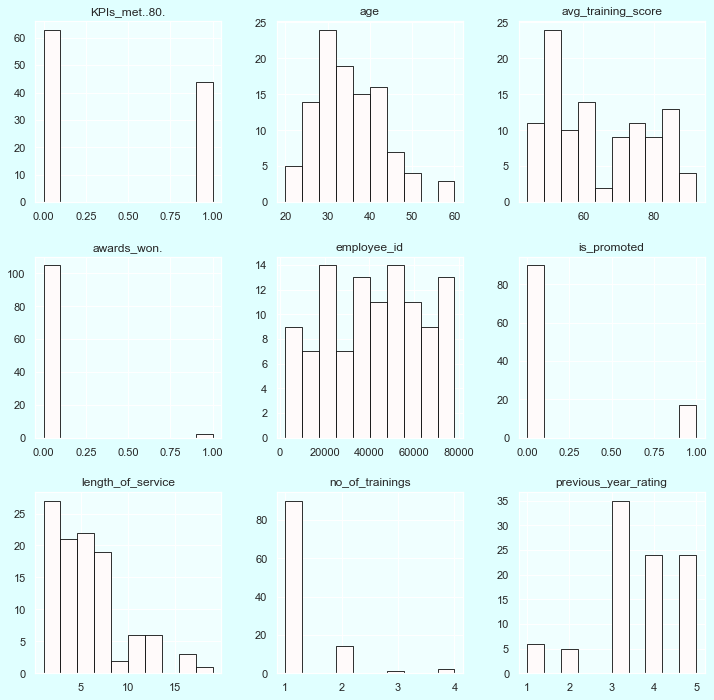

In [18]:
df_train.hist(color = 'snow', edgecolor = 'black', linewidth = 0.8, figsize = (12, 12))

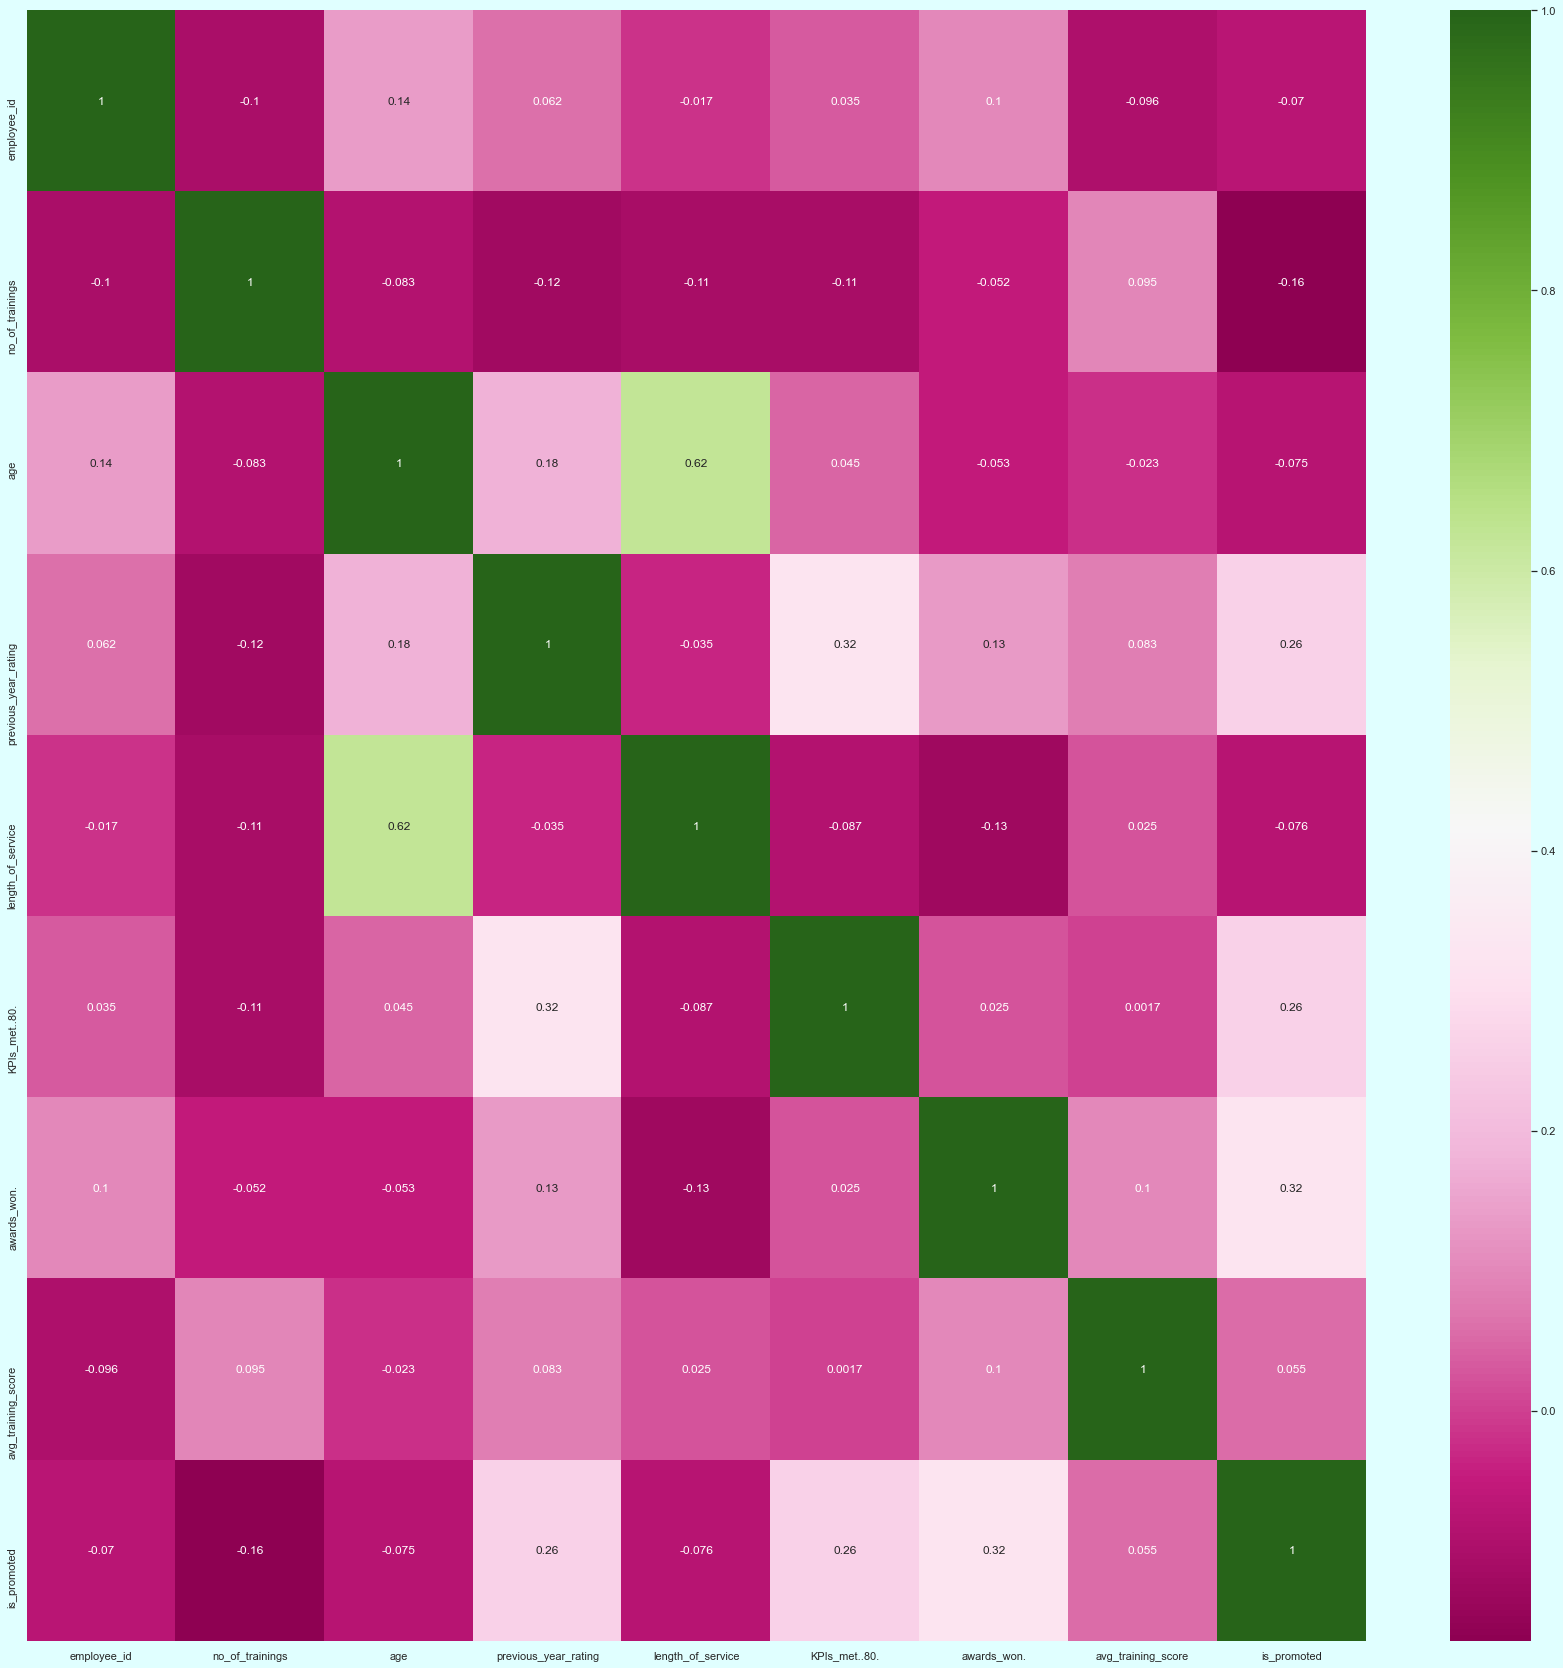

In [19]:
plt.figure(figsize=(30, 30))
sns.heatmap(df_train.corr(), annot=True, cmap="PiYG", annot_kws={"size":12})

In [20]:
df_train.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met..80.,awards_won.,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1.0,35.0,5.0,8.0,1.0,0.0,49.0,0.0
1,65141,Operations,region_22,Bachelor's,m,other,1.0,30.0,5.0,4.0,0.0,0.0,60.0,0.0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1.0,34.0,3.0,7.0,0.0,0.0,50.0,0.0
3,48945,Technology,region_26,Bachelor's,m,other,1.0,45.0,3.0,2.0,0.0,0.0,73.0,0.0
4,58896,Analytics,region_2,Bachelor's,m,sourcing,2.0,31.0,3.0,7.0,0.0,0.0,85.0,0.0


#### different departments in data

In [21]:
df_train['department'].nunique()

9

In [22]:
df_train['department'].value_counts()

Sales & Marketing    36
Operations           17
Procurement          16
Technology           15
Analytics            12
Finance               5
HR                    3
R&D                   3
Legal                 1
Name: department, dtype: int64

#### visualizing different departments

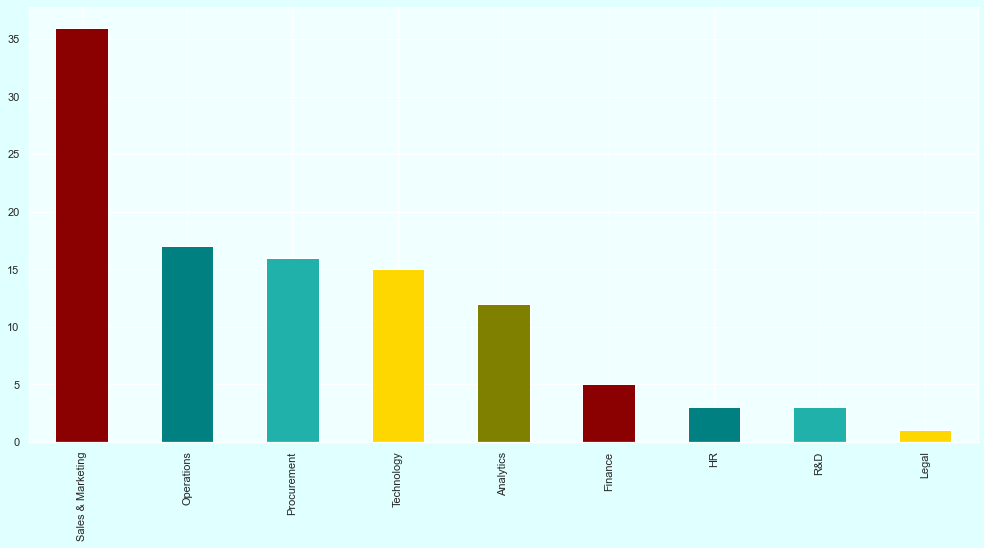

In [23]:
plt.subplots(figsize=(17,8))
df_train['department'].value_counts(normalize = True)
df_train['department'].value_counts(dropna = False).plot.bar(color=['darkred', 'teal', 'lightseagreen', 'gold', 'olive'])
plt.show()

#### different regions in the company

In [24]:
df_train.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met..80.,awards_won.,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1.0,35.0,5.0,8.0,1.0,0.0,49.0,0.0
1,65141,Operations,region_22,Bachelor's,m,other,1.0,30.0,5.0,4.0,0.0,0.0,60.0,0.0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1.0,34.0,3.0,7.0,0.0,0.0,50.0,0.0
3,48945,Technology,region_26,Bachelor's,m,other,1.0,45.0,3.0,2.0,0.0,0.0,73.0,0.0
4,58896,Analytics,region_2,Bachelor's,m,sourcing,2.0,31.0,3.0,7.0,0.0,0.0,85.0,0.0


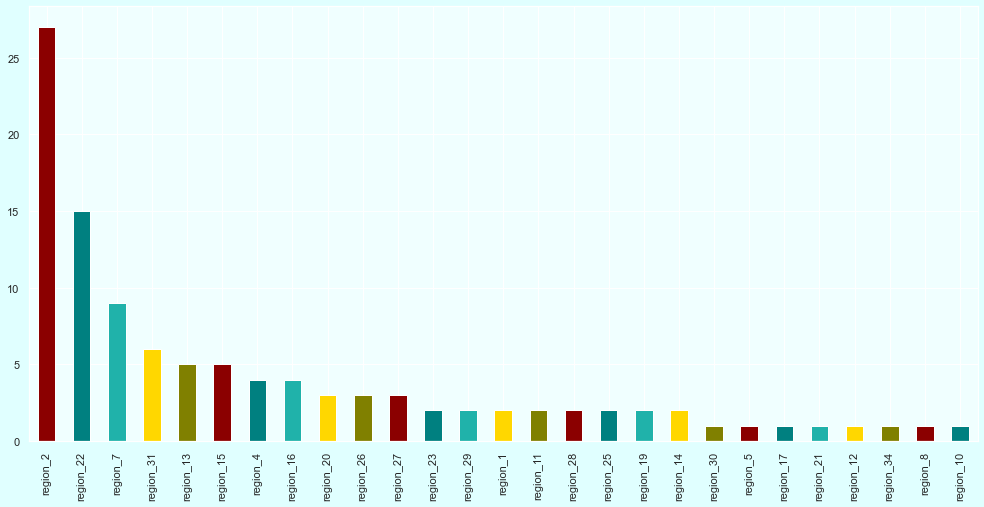

In [25]:
plt.subplots(figsize=(17,8))
df_train['region'].value_counts(normalize = True)
df_train['region'].value_counts(dropna = False).plot.bar(color=['darkred', 'teal', 'lightseagreen', 'gold', 'olive'])
plt.show()

#### Most highlighted department in the data

(-0.5, 399.5, 199.5, -0.5)

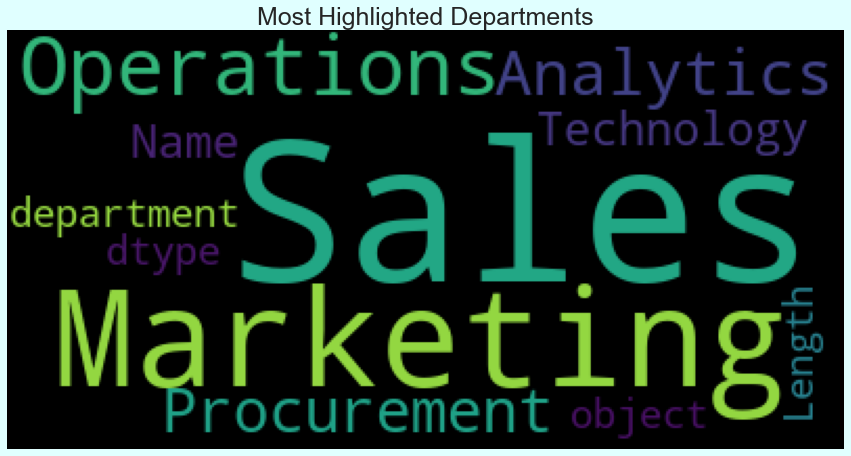

In [26]:
stop_words = set(sw)

word_cloud = wc(stopwords = stop_words).generate(str(df_train['department']))

plt.rcParams['figure.figsize'] = (15, 8)
plt.rcParams['lines.color'] = 'gold'
print(word_cloud)
plt.imshow(word_cloud)
plt.title('Most Highlighted Departments', fontsize = 25)
plt.axis("off")

#### education feature understanding

In [27]:
df_train['education'].value_counts()

Bachelor's          76
Master's & above    26
Name: education, dtype: int64

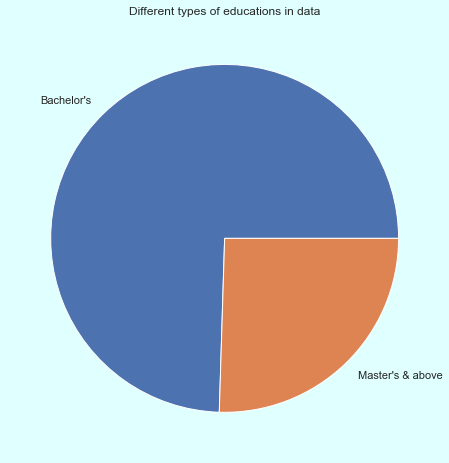

In [28]:
group_data = df_train.groupby('education').size()
plt.figure(figsize = (10,8))
group_data.plot(kind='pie')
plt.title("Different types of educations in data")
plt.ylabel("")
plt.show()

(-0.5, 399.5, 199.5, -0.5)

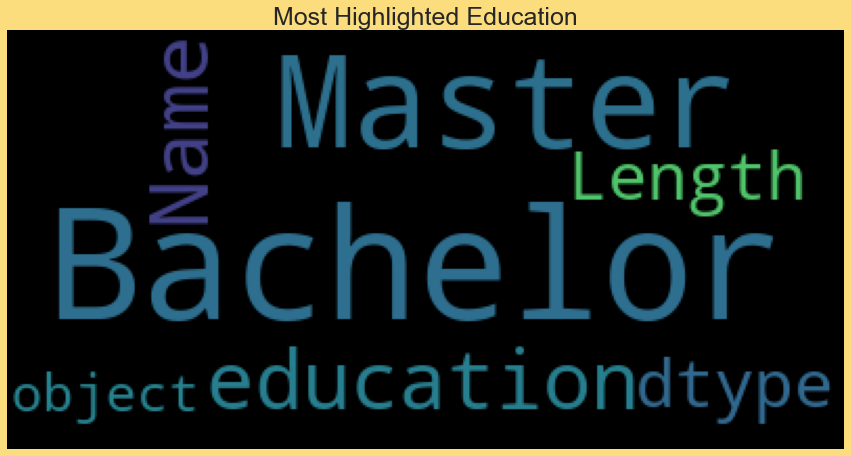

In [29]:
stop_words = set(sw)
fig = plt.figure(figsize = (15,8))
word_cloud = wc(stopwords = stop_words).generate(str(df_train['education']))
fig.patch.set_facecolor('xkcd:wheat')
#plt.rcParams['figure.figsize'] = (15, 8)
plt.rcParams['lines.color'] = 'teal'
print(word_cloud)
plt.imshow(word_cloud)
plt.title('Most Highlighted Education', fontsize = 25)
plt.axis("off")

#### Gender variable understanding

In [30]:
df_train['gender'].value_counts()

m    80
f    28
Name: gender, dtype: int64

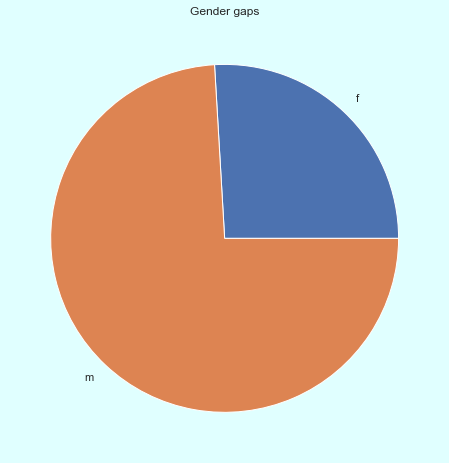

In [31]:
cmap = plt.get_cmap("tab20c")
outer_colors = cmap(np.arange(3)*4)
inner_colors = cmap(np.array([1, 2, 5, 6, 9, 10]))

group_data = df_train.groupby('gender').size()
plt.figure(figsize = (10,8))
group_data.plot(kind='pie')
plt.title("Gender gaps")
plt.ylabel("")
plt.show()

#### Promoted gender Male and Female

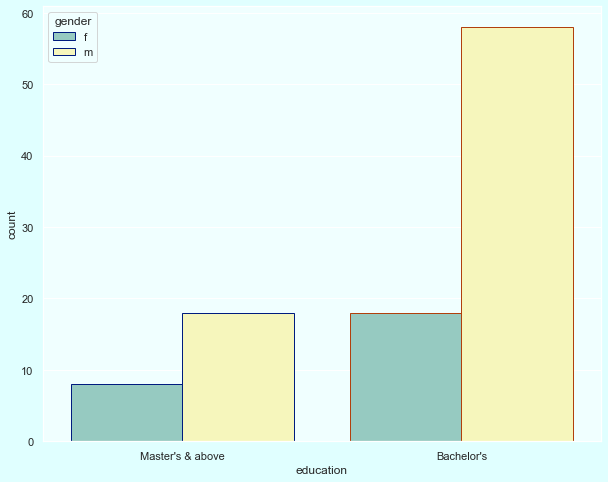

In [32]:
fig = plt.figure(figsize = (10,8))
sns.countplot(x = 'education', data = df_train, hue = 'gender', palette = 'Set3', 
             edgecolor=sns.color_palette("dark", 3))
plt.show()

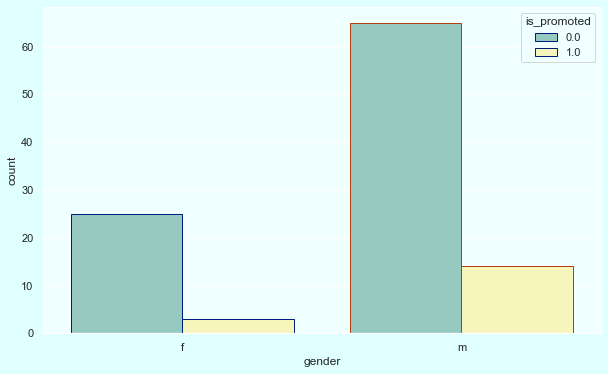

In [33]:
fig = plt.figure(figsize = (10,6))
sns.countplot(x = 'gender', data = df_train, hue = 'is_promoted', palette = 'Set3', 
             edgecolor=sns.color_palette("dark", 3))
plt.show()

In [34]:
df_train['recruitment_channel'].value_counts()

other       58
sourcing    48
referred     2
Name: recruitment_channel, dtype: int64

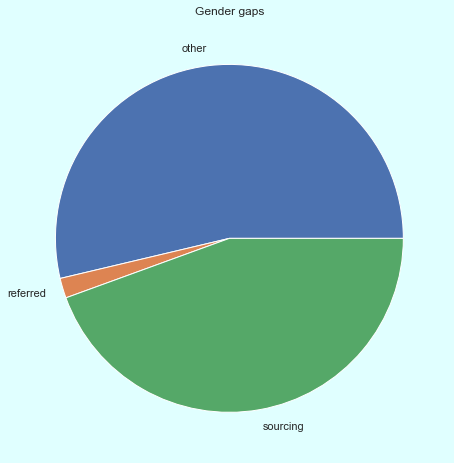

In [35]:
group_data = df_train.groupby('recruitment_channel').size()
plt.figure(figsize = (10,8))
group_data.plot(kind='pie')
plt.title("Gender gaps")
plt.ylabel("")
plt.show()

Text(0.5, 1.0, 'Employees ages distribution')

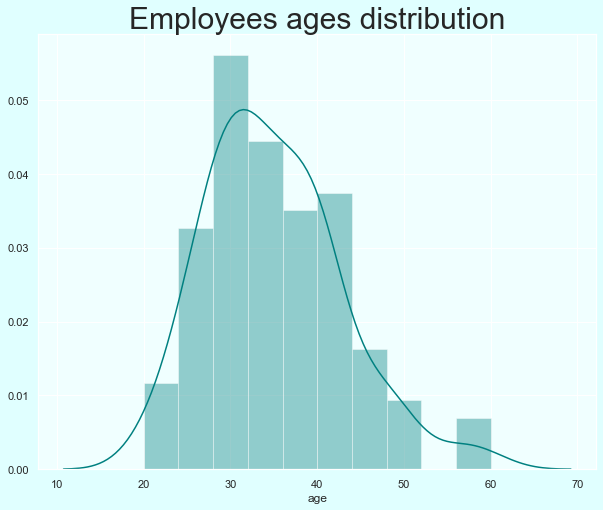

In [36]:
fig = plt.figure(figsize = (10,8))
sns.distplot(df_train['age'], color = 'teal')
plt.title('Employees ages distribution', fontsize = 30)

#### Previous year rating of Employees graph distribution; Univariate

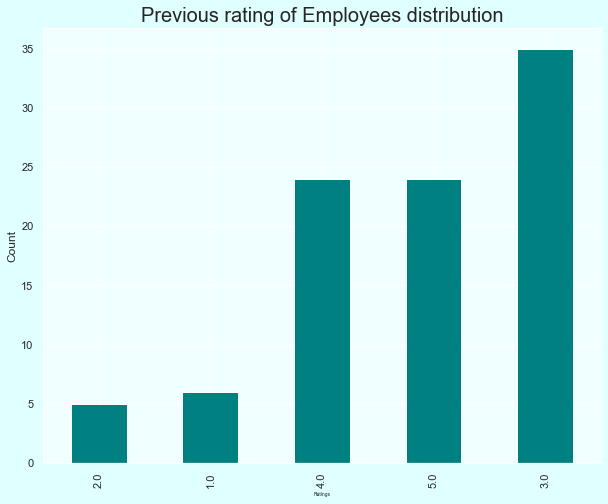

In [37]:
fig = plt.figure(figsize = (10,8))
temp_df = df_train['previous_year_rating'].value_counts()
temp_df = temp_df.sort_values().plot.bar(color = 'teal')
plt.title('Previous rating of Employees distribution', fontsize = 20)
plt.xlabel('Ratings', fontsize = 5)
plt.ylabel('Count')
plt.show()

#### # Length of service distribution

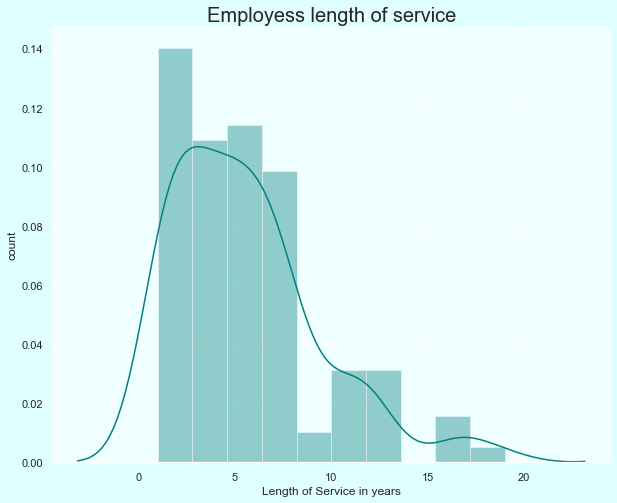

In [38]:
plt.subplots(figsize=(10,8))
sns.distplot(df_train['length_of_service'], color = 'teal')
plt.title('Employess length of service', fontsize = 20)
plt.xlabel('Length of Service in years')
plt.ylabel('count')
plt.show()

In [39]:
df_train.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met..80.,awards_won.,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1.0,35.0,5.0,8.0,1.0,0.0,49.0,0.0
1,65141,Operations,region_22,Bachelor's,m,other,1.0,30.0,5.0,4.0,0.0,0.0,60.0,0.0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1.0,34.0,3.0,7.0,0.0,0.0,50.0,0.0
3,48945,Technology,region_26,Bachelor's,m,other,1.0,45.0,3.0,2.0,0.0,0.0,73.0,0.0
4,58896,Analytics,region_2,Bachelor's,m,sourcing,2.0,31.0,3.0,7.0,0.0,0.0,85.0,0.0


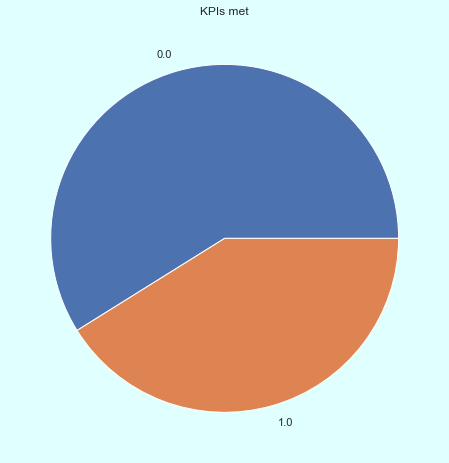

In [40]:
group_data = df_train.groupby('KPIs_met..80.').size()
plt.figure(figsize = (10,8))
group_data.plot(kind='pie')
plt.title("KPIs met")
plt.ylabel("")
plt.show()

In [41]:
df_train['KPIs_met..80.'].value_counts()

0.0    63
1.0    44
Name: KPIs_met..80., dtype: int64

#### Number of awards won

In [42]:
df_train['awards_won.'].value_counts()

0.0    105
1.0      2
Name: awards_won., dtype: int64

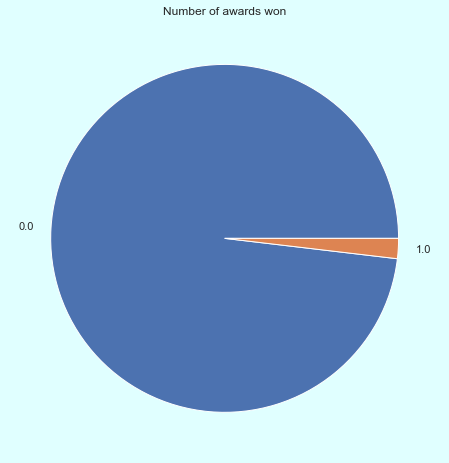

In [43]:
group_data = df_train.groupby('awards_won.').size()
plt.figure(figsize = (10,8))
group_data.plot(kind='pie')
plt.title("Number of awards won")
plt.ylabel("")
plt.show()

In [44]:
df_train.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met..80.,awards_won.,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1.0,35.0,5.0,8.0,1.0,0.0,49.0,0.0
1,65141,Operations,region_22,Bachelor's,m,other,1.0,30.0,5.0,4.0,0.0,0.0,60.0,0.0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1.0,34.0,3.0,7.0,0.0,0.0,50.0,0.0
3,48945,Technology,region_26,Bachelor's,m,other,1.0,45.0,3.0,2.0,0.0,0.0,73.0,0.0
4,58896,Analytics,region_2,Bachelor's,m,sourcing,2.0,31.0,3.0,7.0,0.0,0.0,85.0,0.0


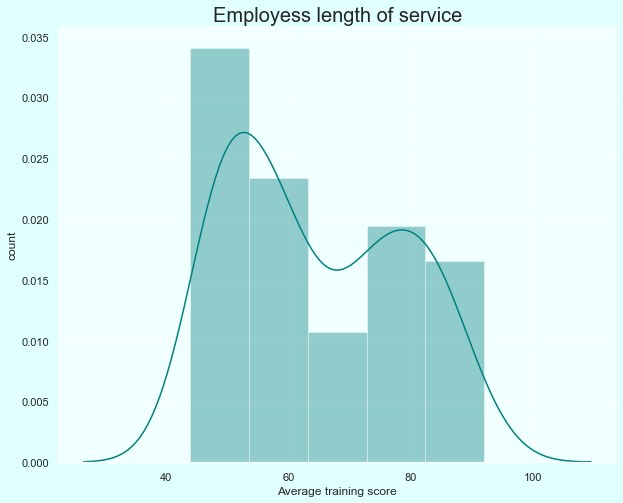

In [45]:
plt.subplots(figsize=(10,8))
sns.distplot(df_train['avg_training_score'], color = 'teal')
plt.title('Employess length of service', fontsize = 20)
plt.xlabel('Average training score')
plt.ylabel('count')
plt.show()

### Number of Employees promoted

In [46]:
df_train['is_promoted'].value_counts()

0.0    90
1.0    17
Name: is_promoted, dtype: int64

In [47]:
def promoted_percentage(vec):
    pro = (vec.iloc[1]/vec.iloc[0])*100
    return ("Percentage of promoted employees are : {:.2f}%".format(pro))

In [48]:
promoted_percentage(df_train['is_promoted'].value_counts())

'Percentage of promoted employees are : 18.89%'

### Bivariate Analysis

In [49]:
df_train.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met..80.,awards_won.,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1.0,35.0,5.0,8.0,1.0,0.0,49.0,0.0
1,65141,Operations,region_22,Bachelor's,m,other,1.0,30.0,5.0,4.0,0.0,0.0,60.0,0.0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1.0,34.0,3.0,7.0,0.0,0.0,50.0,0.0
3,48945,Technology,region_26,Bachelor's,m,other,1.0,45.0,3.0,2.0,0.0,0.0,73.0,0.0
4,58896,Analytics,region_2,Bachelor's,m,sourcing,2.0,31.0,3.0,7.0,0.0,0.0,85.0,0.0


In [50]:
df_train[df_train['avg_training_score'] == 47.0] 

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met..80.,awards_won.,avg_training_score,is_promoted
25,77064,Sales & Marketing,region_22,Bachelor's,m,other,1.0,40.0,2.0,4.0,1.0,0.0,47.0,0.0
27,47123,Sales & Marketing,region_7,Bachelor's,f,sourcing,1.0,40.0,5.0,3.0,0.0,0.0,47.0,0.0
47,26599,Sales & Marketing,region_16,Bachelor's,m,other,2.0,27.0,NaN,1.0,1.0,0.0,47.0,0.0
49,17673,Sales & Marketing,region_4,Master's & above,m,other,1.0,50.0,4.0,17.0,1.0,0.0,47.0,1.0


<Figure size 720x576 with 0 Axes>

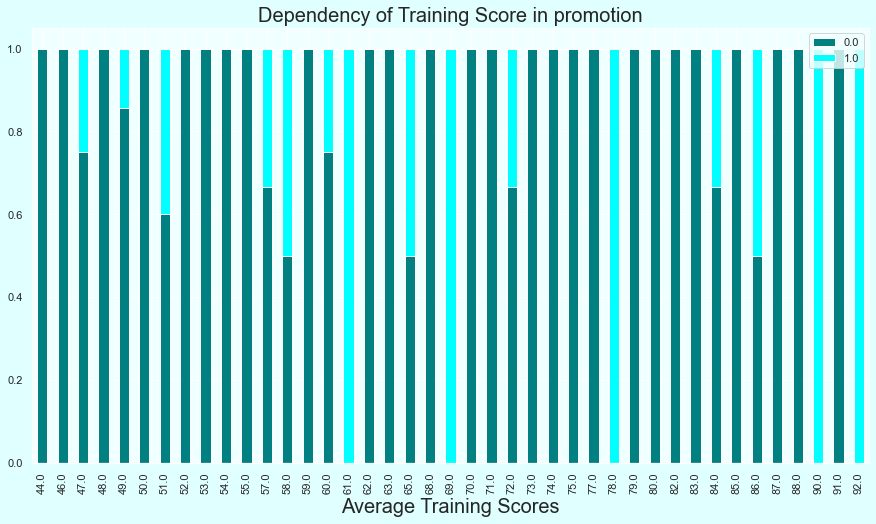

In [51]:
fig = plt.figure(figsize = (10,8))
avg_pro = pd.crosstab(df_train['avg_training_score'], df_train['is_promoted'])
avg_pro.div(avg_pro.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = True, color = ['teal', 'cyan'])

plt.title('Dependency of Training Score in promotion', fontsize = 20)
plt.xlabel('Average Training Scores', fontsize = 20)
plt.legend()
plt.show()

    Pandas crosstab function usually builds cross-tabulation table that can show frequency with certain groups of data. In above figure, certain average training scores have no impact on promotion but duly these average scores are impacted on promotion of employees.

<Figure size 720x144 with 0 Axes>

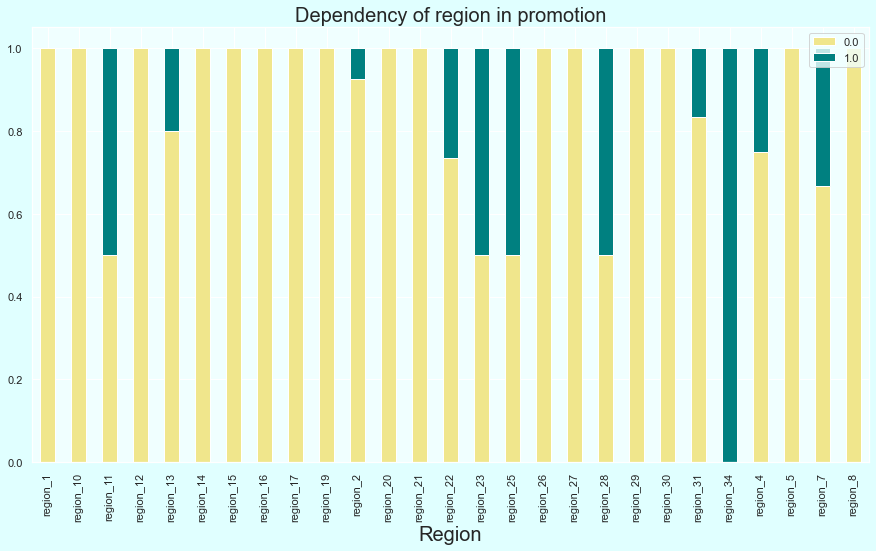

In [52]:
fig = plt.figure(figsize = (10,2))
avg_pro = pd.crosstab(df_train['region'], df_train['is_promoted'])
avg_pro.div(avg_pro.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = True, color = ['khaki', 'teal'])

plt.title('Dependency of region in promotion', fontsize = 20)
plt.xlabel('Region', fontsize = 20)
plt.legend()
plt.show()

    Certain regions have no promotion and at region_34 employees are highly promoted. Rest of all regions are equally distributed with promotions.

<Figure size 720x576 with 0 Axes>

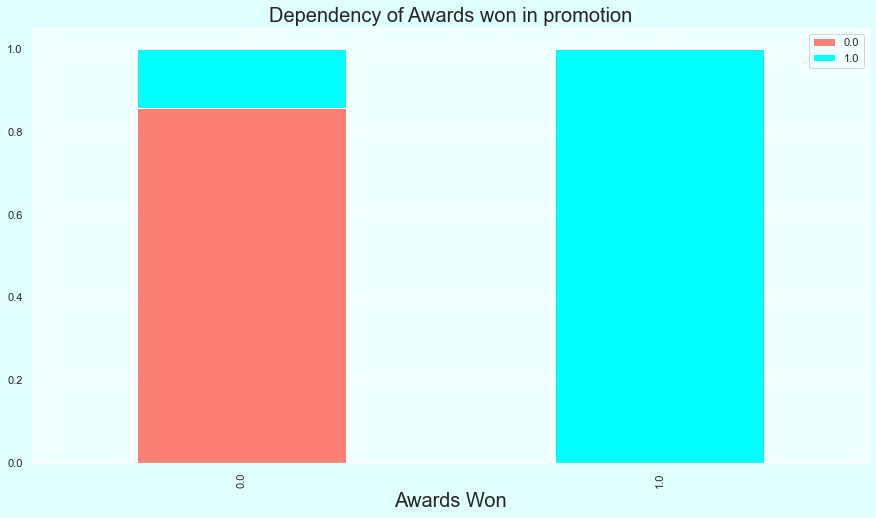

In [53]:
fig = plt.figure(figsize = (10,8))
avg_pro = pd.crosstab(df_train['awards_won.'], df_train['is_promoted'])
avg_pro.div(avg_pro.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = True, color = ['salmon', 'cyan'])

plt.title('Dependency of Awards won in promotion', fontsize = 20)
plt.xlabel('Awards Won', fontsize = 20)
plt.legend()
plt.show()

    Awards won by employees have high impact on promotion, though those who do not win any awards, still have chances to get promotion.

<Figure size 720x576 with 0 Axes>

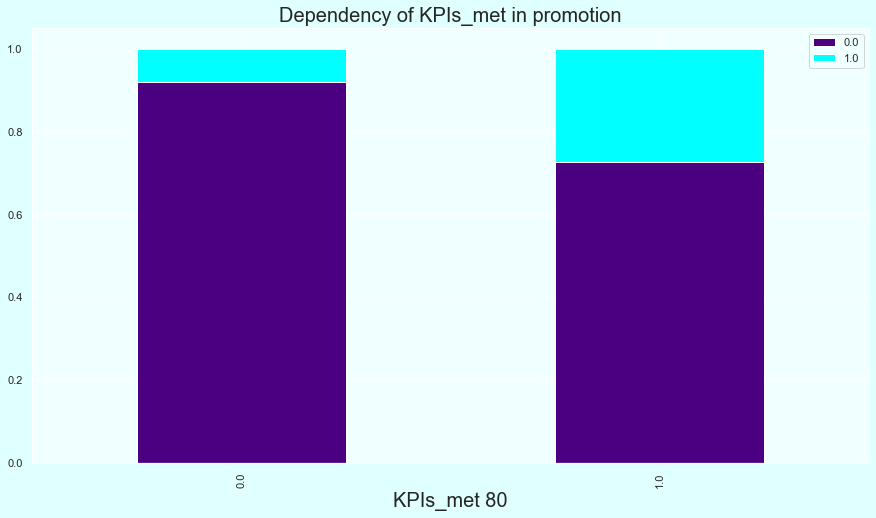

In [54]:
fig = plt.figure(figsize = (10,8))
avg_pro = pd.crosstab(df_train['KPIs_met..80.'], df_train['is_promoted'])
avg_pro.div(avg_pro.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = True, color = ['indigo', 'cyan'])

plt.title('Dependency of KPIs_met in promotion', fontsize = 20)
plt.xlabel('KPIs_met 80', fontsize = 20)
plt.legend()
plt.show()

    Key Performance Indicators(KPI) have clear impact on promotion compared to those who do not show much in performance.

<Figure size 720x576 with 0 Axes>

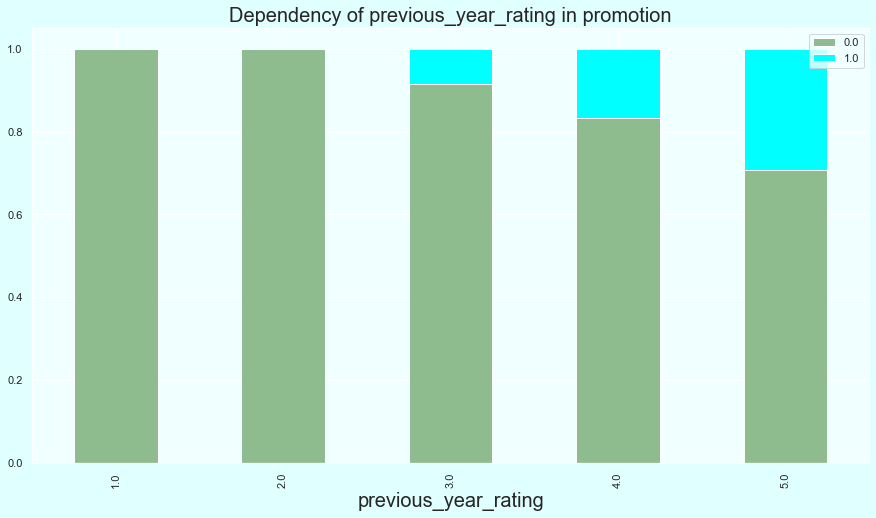

In [55]:
fig = plt.figure(figsize = (10,8))
avg_pro = pd.crosstab(df_train['previous_year_rating'], df_train['is_promoted'])
avg_pro.div(avg_pro.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = True, color = ['darkseagreen', 'cyan'])

plt.title('Dependency of previous_year_rating in promotion', fontsize = 20)
plt.xlabel('previous_year_rating', fontsize = 20)
plt.legend()
plt.show()

    Those who have previous year rating equal to or above 3 has real impact on promotion.

<Figure size 720x576 with 0 Axes>

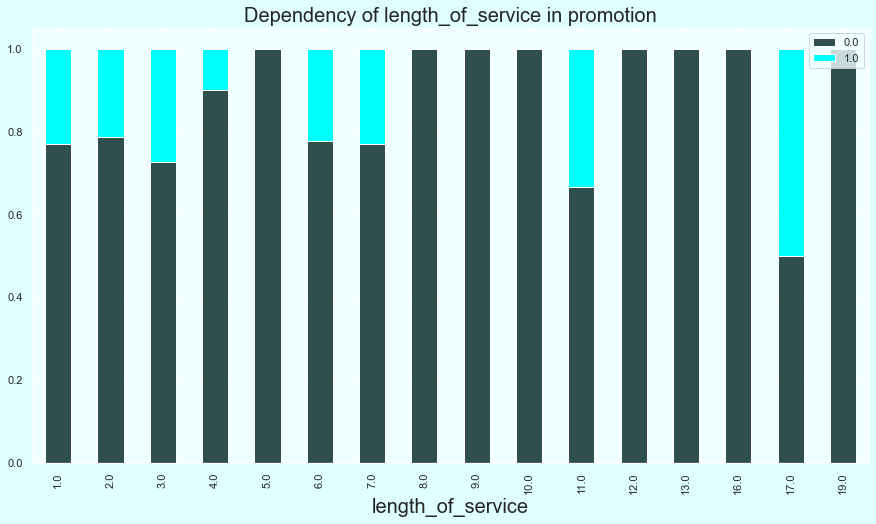

In [56]:
fig = plt.figure(figsize = (10,8))
avg_pro = pd.crosstab(df_train['length_of_service'], df_train['is_promoted'])
avg_pro.div(avg_pro.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = True, color = ['darkslategray', 'cyan'])

plt.title('Dependency of length_of_service in promotion', fontsize = 20)
plt.xlabel('length_of_service', fontsize = 20)
plt.legend()
plt.show()

    In certain cases, service experience has true impact on promotion but that's not really guaranteed in some cases.

<Figure size 720x576 with 0 Axes>

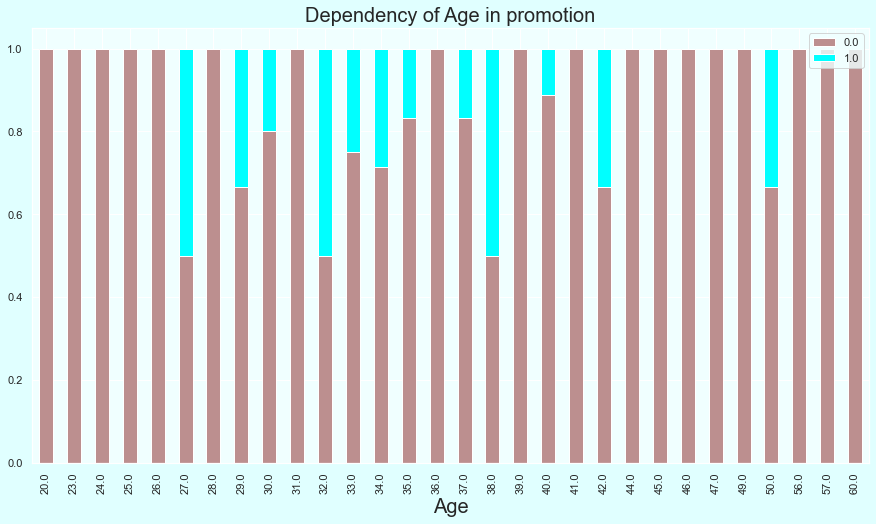

In [57]:
fig = plt.figure(figsize = (10,8))
avg_pro = pd.crosstab(df_train['age'], df_train['is_promoted'])
avg_pro.div(avg_pro.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = True, color = ['rosybrown', 'cyan'])

plt.title('Dependency of Age in promotion', fontsize = 20)
plt.xlabel('Age', fontsize = 20)
plt.legend()
plt.show()

    Promotion with respect to ages have slightly effected. From the above figure, ages from 27 to 50 have high chances of getting promoted.

<Figure size 720x576 with 0 Axes>

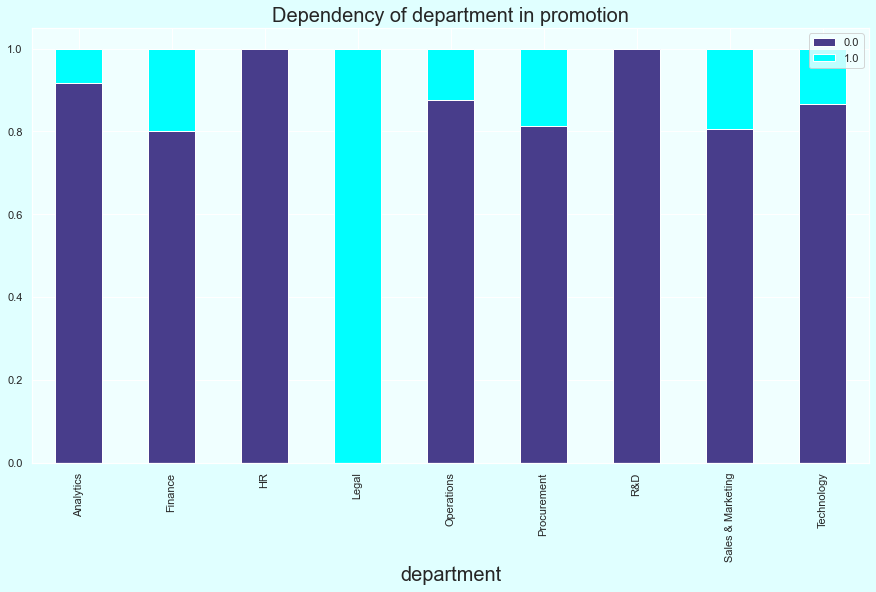

In [58]:
fig = plt.figure(figsize = (10,8))
avg_pro = pd.crosstab(df_train['department'], df_train['is_promoted'])
avg_pro.div(avg_pro.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = True, color = ['darkslateblue', 'cyan'])

plt.title('Dependency of department in promotion', fontsize = 20)
plt.xlabel('department', fontsize = 20)
plt.legend()
plt.show()

    Legal department employees have highly promoted compared to others. R&D department have no growth and remaining all other departments have more chances of getting promotion. 
    

<Figure size 720x576 with 0 Axes>

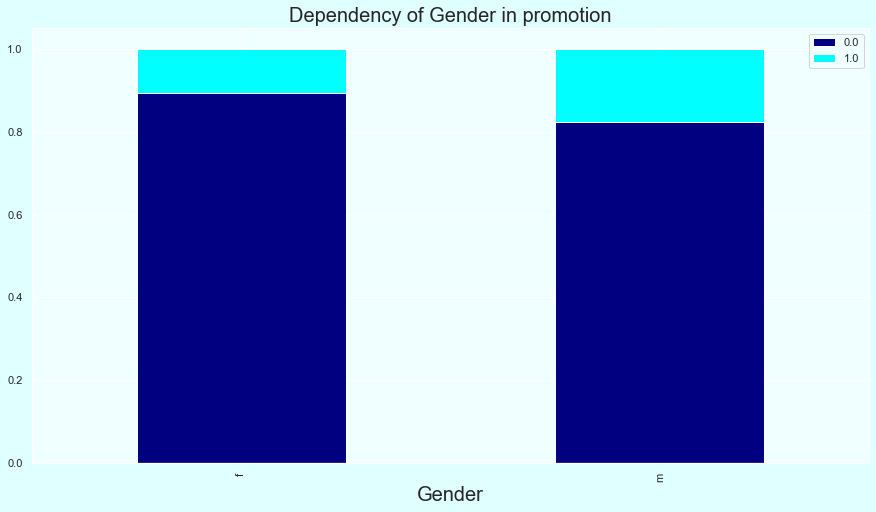

In [59]:
fig = plt.figure(figsize = (10,8))
avg_pro = pd.crosstab(df_train['gender'], df_train['is_promoted'])
avg_pro.div(avg_pro.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = True, color = ['navy', 'cyan'])

plt.title('Dependency of Gender in promotion', fontsize = 20)
plt.xlabel('Gender', fontsize = 20)
plt.legend()
plt.show()

    Genders have equal chances of getting promoted. No partiality have seen from the data. 

### Data Pre-Processing Step

In [60]:
df_train.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met..80.,awards_won.,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1.0,35.0,5.0,8.0,1.0,0.0,49.0,0.0
1,65141,Operations,region_22,Bachelor's,m,other,1.0,30.0,5.0,4.0,0.0,0.0,60.0,0.0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1.0,34.0,3.0,7.0,0.0,0.0,50.0,0.0
3,48945,Technology,region_26,Bachelor's,m,other,1.0,45.0,3.0,2.0,0.0,0.0,73.0,0.0
4,58896,Analytics,region_2,Bachelor's,m,sourcing,2.0,31.0,3.0,7.0,0.0,0.0,85.0,0.0


In [61]:
df_train.count()

employee_id             108
department              108
region                  108
education               102
gender                  108
recruitment_channel     108
no_of_trainings         107
age                     107
previous_year_rating     94
length_of_service       107
KPIs_met..80.           107
awards_won.             107
avg_training_score      107
is_promoted             107
dtype: int64

#### Handling missing data

In [62]:
df_train['education'].fillna(df_train['education'].mode()[0], inplace = True) # filling most frequently occured value in place of missing value.

df_train['previous_year_rating'].fillna(1, inplace = True) # filling 1 those who do not have any previous year rating

df_train['no_of_trainings'].fillna(df_train['no_of_trainings'].mode()[0], inplace = True) # filling most frequent value in place of missig value

df_train['age'].fillna(round(df_train['age'].mean()), inplace = True) # filling average age in place of missing value

#df_train[pd.isnull(df_train['length_of_service'])]
df_train['length_of_service'].fillna(round(df_train['length_of_service'].mean()), inplace = True); # filling rounded average of service length

df_train['KPIs_met..80.'].fillna(df_train['KPIs_met..80.'].mode()[0], inplace = True) # filling frequent value
df_train['awards_won.'].fillna(df_train['awards_won.'].mode()[0], inplace = True) # filling frequent award value
df_train['avg_training_score'].fillna(df_train['avg_training_score'].mean(), inplace = True) # filling average training score value
df_train['is_promoted'].fillna(df_train['is_promoted'].mode()[0], inplace = True) # filling frequently promoted value in place of missing value


In [63]:
df_train.count()

employee_id             108
department              108
region                  108
education               108
gender                  108
recruitment_channel     108
no_of_trainings         108
age                     108
previous_year_rating    108
length_of_service       108
KPIs_met..80.           108
awards_won.             108
avg_training_score      108
is_promoted             108
dtype: int64

In [64]:
df_train.isnull().sum()

employee_id             0
department              0
region                  0
education               0
gender                  0
recruitment_channel     0
no_of_trainings         0
age                     0
previous_year_rating    0
length_of_service       0
KPIs_met..80.           0
awards_won.             0
avg_training_score      0
is_promoted             0
dtype: int64

#### Working with Test data missing values

In [65]:
df_test.isnull().sum()

employee_id               0
department                1
region                    1
education               176
gender                    1
recruitment_channel       1
no_of_trainings           1
age                       1
previous_year_rating    290
length_of_service         1
KPIs_met..80.             1
awards_won.               1
avg_training_score        1
is_promoted               1
dtype: int64

In [66]:
df_test.shape

(3956, 14)

In [67]:
df_test['no_of_trainings'].mean()

1.2556257901390644

In [68]:
df_test['department'].fillna(df_test['department'].mode()[0], inplace = True) # filling most frequently occured value in place of missing value.

df_test['region'].fillna(df_test['region'].mode()[0], inplace = True) # filling most frequently occured value in place of missing value.

df_test['education'].fillna(df_test['education'].mode()[0], inplace = True) # filling most frequently occured value in place of missing value

df_test['gender'].fillna(df_test['gender'].mode()[0], inplace = True) # filling most frequently occured value in place of missing value

df_test['recruitment_channel'].fillna(df_test['recruitment_channel'].mode()[0], inplace = True) # filling most frequently occured value in place of missing value

df_test['no_of_trainings'].fillna(round(df_test['no_of_trainings'].mean()), inplace = True) # filling most frequently occured value in place of missing value

df_test['age'].fillna(round(df_test['age'].mean()), inplace = True) # filling average age in place of missing value

df_test['previous_year_rating'].fillna(1, inplace = True) # filling 1 those who do not have any previous year rating

df_test['length_of_service'].fillna(round(df_test['length_of_service'].mean()), inplace = True); # filling rounded average of service length

df_test['KPIs_met..80.'].fillna(df_test['KPIs_met..80.'].mode()[0], inplace = True) # filling frequent value

df_test['awards_won.'].fillna(df_test['awards_won.'].mode()[0], inplace = True) # filling frequent award value

df_test['avg_training_score'].fillna(round(df_test['avg_training_score'].mean()), inplace = True) # filling average training score value

df_test['is_promoted'].fillna(df_test['is_promoted'].mode()[0], inplace = True) # filling frequently promoted value in place of missing value


In [69]:
df_test.isnull().sum()

employee_id             0
department              0
region                  0
education               0
gender                  0
recruitment_channel     0
no_of_trainings         0
age                     0
previous_year_rating    0
length_of_service       0
KPIs_met..80.           0
awards_won.             0
avg_training_score      0
is_promoted             0
dtype: int64

In [70]:
df_test.count()

employee_id             3956
department              3956
region                  3956
education               3956
gender                  3956
recruitment_channel     3956
no_of_trainings         3956
age                     3956
previous_year_rating    3956
length_of_service       3956
KPIs_met..80.           3956
awards_won.             3956
avg_training_score      3956
is_promoted             3956
dtype: int64

In [71]:
df_train = df_train.drop(['employee_id'], axis = 1)
df_test = df_test.drop(['employee_id'], axis = 1)

In [72]:
df_train.shape

(108, 13)

In [73]:
df_test.shape

(3956, 13)

In [74]:
print (df_train.columns)

Index(['department', 'region', 'education', 'gender', 'recruitment_channel',
       'no_of_trainings', 'age', 'previous_year_rating', 'length_of_service',
       'KPIs_met..80.', 'awards_won.', 'avg_training_score', 'is_promoted'],
      dtype='object')


In [75]:
print (df_test.columns)

Index(['department', 'region', 'education', 'gender', 'recruitment_channel',
       'no_of_trainings', 'age', 'previous_year_rating', 'length_of_service',
       'KPIs_met..80.', 'awards_won.', 'avg_training_score', 'is_promoted'],
      dtype='object')


In [76]:
y_test = df_test.iloc[:, -1]

In [77]:
test = df_test.drop(['is_promoted'], axis = 1)
print (test.shape)


(3956, 12)


In [78]:
x_test = pd.get_dummies(test)
x_test.columns

Index(['no_of_trainings', 'age', 'previous_year_rating', 'length_of_service',
       'KPIs_met..80.', 'awards_won.', 'avg_training_score',
       'department_Analytics', 'department_Finance', 'department_HR',
       'department_Legal', 'department_Operations', 'department_Procurement',
       'department_R&D', 'department_Sales & Marketing',
       'department_Technology', 'region_region_1', 'region_region_10',
       'region_region_11', 'region_region_12', 'region_region_13',
       'region_region_14', 'region_region_15', 'region_region_16',
       'region_region_17', 'region_region_18', 'region_region_19',
       'region_region_2', 'region_region_20', 'region_region_21',
       'region_region_22', 'region_region_23', 'region_region_24',
       'region_region_25', 'region_region_26', 'region_region_27',
       'region_region_28', 'region_region_29', 'region_region_3',
       'region_region_30', 'region_region_31', 'region_region_32',
       'region_region_33', 'region_region_34', 'reg

In [79]:
x_test.shape

(3956, 58)

In [80]:
x_test.head()

,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met..80.,awards_won.,avg_training_score,department_Analytics,department_Finance,department_HR,...,region_region_8,region_region_9,education_Bachelor's,education_Below Secondary,education_Master's & above,gender_f,gender_m,recruitment_channel_other,recruitment_channel_referred,recruitment_channel_sourcing
0,1.0,42.0,4.0,4.0,1.0,0.0,48.0,0,0,0,...,0,0,0,0,1,1,0,0,0,1
1,2.0,24.0,3.0,2.0,0.0,0.0,77.0,0,0,0,...,0,0,0,1,0,1,0,1,0,0
2,2.0,36.0,3.0,7.0,0.0,0.0,50.0,0,0,0,...,0,0,0,0,1,0,1,1,0,0
3,1.0,33.0,3.0,6.0,0.0,0.0,54.0,0,0,0,...,0,0,1,0,0,0,1,1,0,0
4,1.0,42.0,4.0,4.0,0.0,0.0,79.0,0,0,0,...,0,0,0,0,1,0,1,0,0,1


### Training Model with df_train

In [81]:
x = df_train.iloc[:, :-1]
y = df_train.iloc[:, -1]

print (x.shape)
print (y.shape)

(108, 12)
(108,)


In [82]:
# encoding categorical variables

x = pd.get_dummies(x)
print (x.columns)

Index(['no_of_trainings', 'age', 'previous_year_rating', 'length_of_service',
       'KPIs_met..80.', 'awards_won.', 'avg_training_score',
       'department_Analytics', 'department_Finance', 'department_HR',
       'department_Legal', 'department_Operations', 'department_Procurement',
       'department_R&D', 'department_Sales & Marketing',
       'department_Technology', 'region_region_1', 'region_region_10',
       'region_region_11', 'region_region_12', 'region_region_13',
       'region_region_14', 'region_region_15', 'region_region_16',
       'region_region_17', 'region_region_19', 'region_region_2',
       'region_region_20', 'region_region_21', 'region_region_22',
       'region_region_23', 'region_region_25', 'region_region_26',
       'region_region_27', 'region_region_28', 'region_region_29',
       'region_region_30', 'region_region_31', 'region_region_34',
       'region_region_4', 'region_region_5', 'region_region_7',
       'region_region_8', 'education_Bachelor's', 'ed

In [83]:
temp = list(set(list(x_test.columns)).intersection(set(list(x.columns))))
len(temp)

50

In [84]:
x_test = x_test[temp]
print (x_test.shape)
x_test.columns

(3956, 50)


Index(['gender_f', 'education_Master's & above', 'region_region_4',
       'department_Analytics', 'region_region_29', 'region_region_34',
       'region_region_27', 'no_of_trainings', 'region_region_31',
       'awards_won.', 'region_region_16', 'department_Legal',
       'region_region_2', 'department_Procurement', 'region_region_13', 'age',
       'region_region_7', 'region_region_20', 'KPIs_met..80.',
       'department_Sales & Marketing', 'recruitment_channel_referred',
       'region_region_14', 'region_region_11', 'region_region_25',
       'previous_year_rating', 'region_region_1', 'length_of_service',
       'region_region_5', 'region_region_10', 'recruitment_channel_sourcing',
       'department_HR', 'region_region_21', 'region_region_19',
       'department_Operations', 'department_R&D', 'region_region_15',
       'region_region_17', 'region_region_22', 'region_region_28',
       'department_Finance', 'region_region_30', 'region_region_8',
       'region_region_23', 'avg_tra

In [85]:
from imblearn.over_sampling import SMOTE

x_sample, y_sample = SMOTE().fit_sample(x, y.values.ravel())

x_sample = pd.DataFrame(x_sample)
y_sample = pd.DataFrame(y_sample)

# checking the sizes of the sample data
print("Size of x-sample :", x_sample.shape)
print("Size of y-sample :", y_sample.shape)

Size of x-sample : (182, 50)
Size of y-sample : (182, 1)


In [86]:
# splitting x and y into train and validation sets

from sklearn.model_selection import train_test_split

x_train, x_valid, y_train, y_valid = train_test_split(x_sample, y_sample, test_size = 0.3, random_state = 42)

print("Shape of x_train: ", x_train.shape)
print("Shape of x_valid: ", x_valid.shape)
print("Shape of y_train: ", y_train.shape)
print("Shape of y_valid: ", y_valid.shape)

Shape of x_train:  (127, 50)
Shape of x_valid:  (55, 50)
Shape of y_train:  (127, 1)
Shape of y_valid:  (55, 1)


In [87]:
df_test.shape

(3956, 13)

In [88]:
x_test.shape

(3956, 50)

#### Standardizing data

In [89]:
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

### Model RandomForestClassifier

In [93]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score


rfc = RandomForestClassifier()
rfc.fit(x_train, y_train)

rfc_pred = rfc.predict(x_test)

cr = classification_report(y_test,rfc_pred)
print(cr)
print()
cm = confusion_matrix(y_test,rfc_pred)
print(cm)

print("Accuracy :", roc_auc_score(y_test, rfc_pred))

              precision    recall  f1-score   support

         0.0       0.91      0.36      0.51      3631
         1.0       0.08      0.58      0.13       325

    accuracy                           0.38      3956
   macro avg       0.49      0.47      0.32      3956
weighted avg       0.84      0.38      0.48      3956


[[1305 2326]
 [ 136  189]]
Accuracy : 0.47047179204711564


#### Running a loop with increasing number of trees in the random forest and checking accuracy of confusion matrix

In [94]:
nsimu = 21
accuracy=[0]*nsimu
ntree = [0]*nsimu
for i in range(1,nsimu):
    rfc = RandomForestClassifier(n_estimators=i*5,min_samples_split=10,max_depth=None,criterion='gini')
    rfc.fit(x_train, y_train)
    rfc_pred = rfc.predict(x_test)
    cm = confusion_matrix(y_test,rfc_pred)
    accuracy[i] = (cm[0,0]+cm[1,1])/cm.sum()
    ntree[i]=i*5

In [95]:
print (accuracy)
print()
print(ntree)

[0, 0.4673913043478261, 0.39408493427704755, 0.3361981799797776, 0.4201213346814965, 0.31749241658240646, 0.35591506572295245, 0.2846309403437816, 0.23104145601617795, 0.33645096056622853, 0.35995955510616784, 0.352376137512639, 0.43882709807886755, 0.35490394337714865, 0.3660262891809909, 0.4628412537917088, 0.4696663296258847, 0.41885743174924167, 0.40672396359959556, 0.391051567239636, 0.35136501516683516]

[0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100]


Text(0, 0.5, 'Prediction accuracy from confusion matrix')

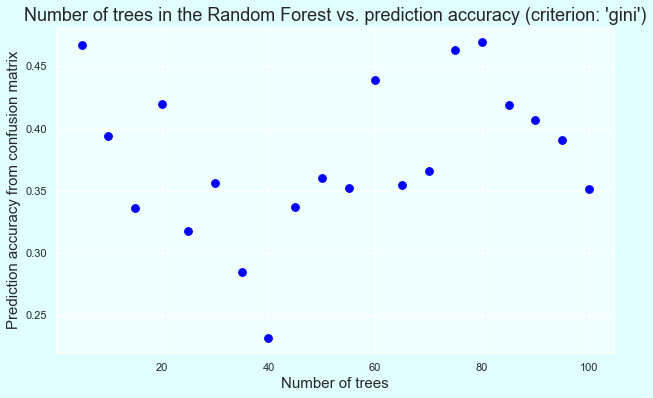

In [96]:
plt.figure(figsize=(10,6))
plt.scatter(x=ntree[1:nsimu],y=accuracy[1:nsimu],s=60,c='blue')
plt.title("Number of trees in the Random Forest vs. prediction accuracy (criterion: 'gini')", fontsize=18)
plt.xlabel("Number of trees", fontsize=15)
plt.ylabel("Prediction accuracy from confusion matrix", fontsize=15)

In [97]:
nsimu = 21
accuracy=[0]*nsimu
ntree = [0]*nsimu
for i in range(1,nsimu):
    rfc = RandomForestClassifier(n_estimators=i*5,min_samples_split=10,max_depth=None,criterion='entropy')
    rfc.fit(x_train, y_train)
    rfc_pred = rfc.predict(x_test)
    cm = confusion_matrix(y_test,rfc_pred)
    accuracy[i] = (cm[0,0]+cm[1,1])/cm.sum()
    ntree[i]=i*5

Text(0, 0.5, 'Prediction accuracy from confusion matrix')

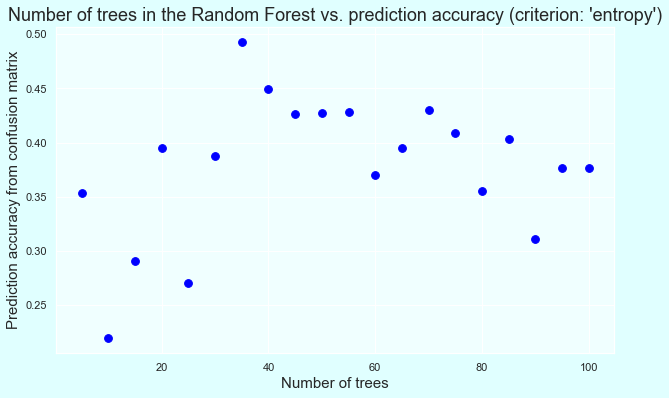

In [98]:
plt.figure(figsize=(10,6))
plt.scatter(x=ntree[1:nsimu],y=accuracy[1:nsimu],s=60,c='blue')
plt.title("Number of trees in the Random Forest vs. prediction accuracy (criterion: 'entropy')", fontsize=18)
plt.xlabel("Number of trees", fontsize=15)
plt.ylabel("Prediction accuracy from confusion matrix", fontsize=15)

#### Fixing max tree depth

In [99]:
nsimu = 21
accuracy=[0]*nsimu
ntree = [0]*nsimu
for i in range(1,nsimu):
    rfc = RandomForestClassifier(n_estimators=i*5,min_samples_split=10,max_depth=None,criterion='gini')
    rfc.fit(x_train, y_train)
    rfc_pred = rfc.predict(x_test)
    cm = confusion_matrix(y_test,rfc_pred)
    accuracy[i] = (cm[0,0]+cm[1,1])/cm.sum()
    ntree[i]=i*5

Text(0, 0.5, 'Prediction accuracy from confusion matrix')

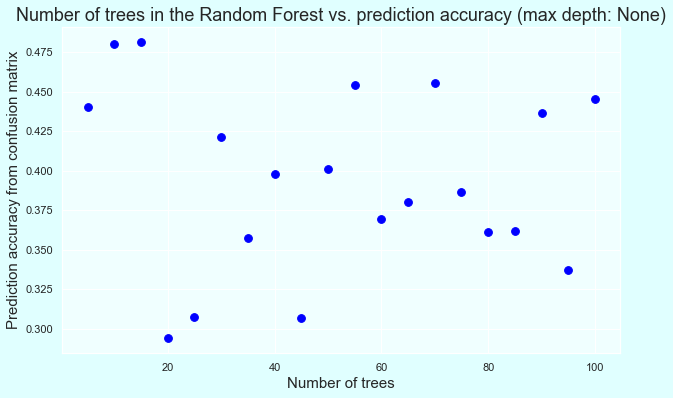

In [100]:
plt.figure(figsize=(10,6))
plt.scatter(x=ntree[1:nsimu],y=accuracy[1:nsimu],s=60,c='blue')
plt.title("Number of trees in the Random Forest vs. prediction accuracy (max depth: None)", fontsize=18)
plt.xlabel("Number of trees", fontsize=15)
plt.ylabel("Prediction accuracy from confusion matrix", fontsize=15)

    Fixing maximum depth is None and with "gini" criterion, model is able to achieve approximately 70% accuracy with below 10 n_estimators.

In [101]:
nsimu = 21
accuracy=[0]*nsimu
ntree = [0]*nsimu
for i in range(1,nsimu):
    rfc = RandomForestClassifier(n_estimators=i*5,min_samples_split=10,max_depth=5,criterion='gini')
    rfc.fit(x_train, y_train)
    rfc_pred = rfc.predict(x_test)
    cm = confusion_matrix(y_test,rfc_pred)
    accuracy[i] = (cm[0,0]+cm[1,1])/cm.sum()
    ntree[i]=i*5

Text(0, 0.5, 'Prediction accuracy from confusion matrix')

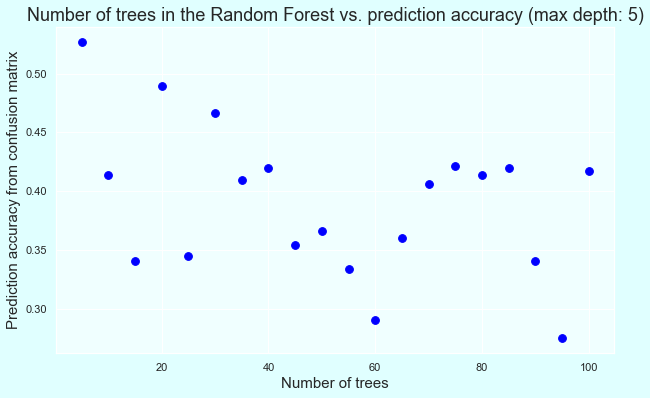

In [102]:
plt.figure(figsize=(10,6))
plt.scatter(x=ntree[1:nsimu],y=accuracy[1:nsimu],s=60,c='blue')
plt.title("Number of trees in the Random Forest vs. prediction accuracy (max depth: 5)", fontsize=18)
plt.xlabel("Number of trees", fontsize=15)
plt.ylabel("Prediction accuracy from confusion matrix", fontsize=15)

#### Minimum sample split criteria

In [103]:
nsimu = 21
accuracy=[0]*nsimu
ntree = [0]*nsimu
for i in range(1,nsimu):
    rfc = RandomForestClassifier(n_estimators=i*5,min_samples_split=2,max_depth=None,criterion='gini')
    rfc.fit(x_train, y_train)
    rfc_pred = rfc.predict(x_test)
    cm = confusion_matrix(y_test,rfc_pred)
    accuracy[i] = (cm[0,0]+cm[1,1])/cm.sum()
    ntree[i]=i*5

Text(0, 0.5, 'Prediction accuracy from confusion matrix')

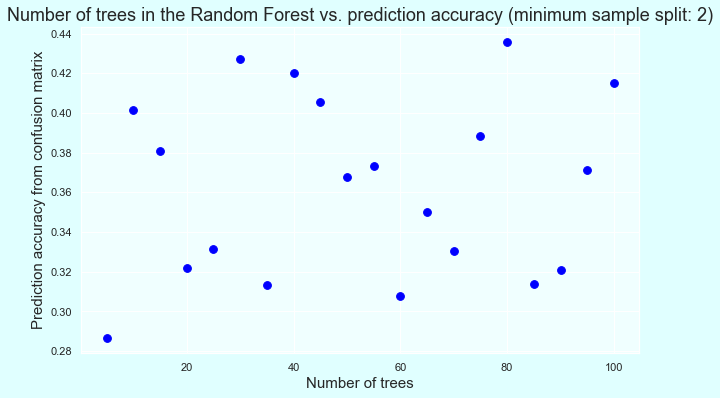

In [104]:
plt.figure(figsize=(10,6))
plt.scatter(x=ntree[1:nsimu],y=accuracy[1:nsimu],s=60,c='blue')
plt.title("Number of trees in the Random Forest vs. prediction accuracy (minimum sample split: 2)", fontsize=18)
plt.xlabel("Number of trees", fontsize=15)
plt.ylabel("Prediction accuracy from confusion matrix", fontsize=15)

In [105]:
nsimu = 21
accuracy=[0]*nsimu
ntree = [0]*nsimu
for i in range(1,nsimu):
    rfc = RandomForestClassifier(n_estimators=i*5,min_samples_split=20,max_depth=None,criterion='gini')
    rfc.fit(x_train, y_train)
    rfc_pred = rfc.predict(x_test)
    cm = confusion_matrix(y_test,rfc_pred)
    accuracy[i] = (cm[0,0]+cm[1,1])/cm.sum()
    ntree[i]=i*5

Text(0, 0.5, 'Prediction accuracy from confusion matrix')

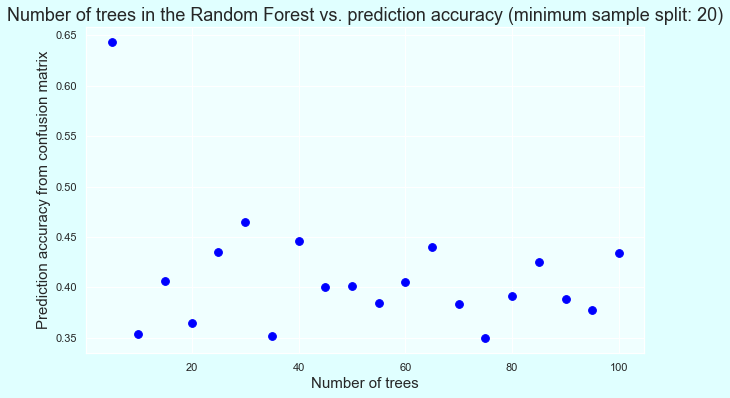

In [106]:
plt.figure(figsize=(10,6))
plt.scatter(x=ntree[1:nsimu],y=accuracy[1:nsimu],s=60,c='blue')
plt.title("Number of trees in the Random Forest vs. prediction accuracy (minimum sample split: 20)", fontsize=18)
plt.xlabel("Number of trees", fontsize=15)
plt.ylabel("Prediction accuracy from confusion matrix", fontsize=15)

### XGBClassifier

In [107]:
from xgboost.sklearn import XGBClassifier
from sklearn.metrics import roc_auc_score

xgb = XGBClassifier()
xgb.fit(x_train, y_train)

xgb_pred = xgb.predict(x_test)
predictions = xgb.predict(x_test)

print("Accuracy :", roc_auc_score(y_test, predictions))
print(confusion_matrix(y_test,predictions))

print(classification_report(y_test,predictions))

Accuracy : 0.4839323771794165
[[ 576 3055]
 [  62  263]]
              precision    recall  f1-score   support

         0.0       0.90      0.16      0.27      3631
         1.0       0.08      0.81      0.14       325

    accuracy                           0.21      3956
   macro avg       0.49      0.48      0.21      3956
weighted avg       0.84      0.21      0.26      3956



### Decision Tree Classifier

In [110]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report,confusion_matrix

clf_tree = DecisionTreeClassifier(criterion = 'gini', max_depth = 3)
clf_tree.fit( x_train, y_train )
tree_predict = clf_tree.predict(x_test) 
metrics.roc_auc_score(y_test, tree_predict)

0.50413109336271

In [111]:
predictions = clf_tree.predict(x_test)
print(confusion_matrix(y_test,predictions))

print(classification_report(y_test,predictions))
print("Accuracy :", roc_auc_score(y_test, predictions))

[[  30 3601]
 [   0  325]]
              precision    recall  f1-score   support

         0.0       1.00      0.01      0.02      3631
         1.0       0.08      1.00      0.15       325

    accuracy                           0.09      3956
   macro avg       0.54      0.50      0.08      3956
weighted avg       0.92      0.09      0.03      3956

Accuracy : 0.50413109336271


In [112]:
from sklearn.model_selection import train_test_split

x_train, x_valid, y_train, y_valid = train_test_split(x_sample, y_sample, test_size = 0.3, random_state = 42)

print("Shape of x_train: ", x_train.shape)
print("Shape of x_valid: ", x_valid.shape)
print("Shape of y_train: ", y_train.shape)


Shape of x_train:  (127, 50)
Shape of x_valid:  (55, 50)
Shape of y_train:  (127, 1)


### Support Vector Classifier

In [113]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report,confusion_matrix
model = SVC()
model.fit(x_train,y_train)

predictions = model.predict(x_test)
print(confusion_matrix(y_test,predictions))

print(classification_report(y_test,predictions))
print("Accuracy :", roc_auc_score(y_test, predictions))

[[3631    0]
 [ 325    0]]
              precision    recall  f1-score   support

         0.0       0.92      1.00      0.96      3631
         1.0       0.00      0.00      0.00       325

    accuracy                           0.92      3956
   macro avg       0.46      0.50      0.48      3956
weighted avg       0.84      0.92      0.88      3956

Accuracy : 0.5


In [114]:
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [0.1,1, 10, 100, 1000], 'gamma': [1,0.1,0.01,0.001,0.0001], 'kernel': ['rbf']}
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=1)
grid.fit(x_train,y_train)
grid.best_params_

Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 125 out of 125 | elapsed:    0.7s finished


{'C': 1000, 'gamma': 0.001, 'kernel': 'rbf'}

In [115]:
grid.best_estimator_

SVC(C=1000, gamma=0.001)

In [116]:
grid_predictions = grid.predict(x_test)
print(confusion_matrix(y_test,grid_predictions))
print(classification_report(y_test,grid_predictions))
print("Accuracy :", roc_auc_score(y_test, grid_predictions))

[[3631    0]
 [ 325    0]]
              precision    recall  f1-score   support

         0.0       0.92      1.00      0.96      3631
         1.0       0.00      0.00      0.00       325

    accuracy                           0.92      3956
   macro avg       0.46      0.50      0.48      3956
weighted avg       0.84      0.92      0.88      3956

Accuracy : 0.5


#### Another set of parameters of GridSearch

In [117]:
param_grid = {'C': [50,75,100,125,150], 'gamma': [1e-2,1e-3,1e-4,1e-5,1e-6], 'kernel': ['rbf']} 
grid = GridSearchCV(SVC(tol=1e-5),param_grid,refit=True,verbose=1)
grid.fit(x_train,y_train)
grid.best_estimator_

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=1)]: Done 125 out of 125 | elapsed:    0.6s finished


SVC(C=125, gamma=0.001, tol=1e-05)

    The regularization parameter is a control on your fitting parameters. As the magnitues of the fitting parameters increase, there will be an increasing penalty on the cost function. This penalty is dependent on the squares of the parameters as well as the magnitude of .
    
    the gamma parameter defines how far the influence of a single training example reaches, with low values meaning 'far' and high values meaning 'close'. ... The gamma parameters can be seen as the inverse of the radius of influence of samples selected by the model as support vectors.

In [118]:
grid.best_params_

{'C': 125, 'gamma': 0.001, 'kernel': 'rbf'}

In [119]:
grid_predictions = grid.predict(x_test)
print(confusion_matrix(y_test,grid_predictions))

print("Accuracy :", roc_auc_score(y_test, grid_predictions))

[[3631    0]
 [ 325    0]]
Accuracy : 0.5


    No change observed with different set of parameters of GridSearch